# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 3641 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=2)


  0% (   0 of 3641) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 3641) |                       | Elapsed Time: 0:00:26 ETA: 2:56:10

  0% (  25 of 3641) |                       | Elapsed Time: 0:00:26 ETA: 1:03:39

  1% (  46 of 3641) |                       | Elapsed Time: 0:00:26 ETA: 0:40:53

  1% (  63 of 3641) |                       | Elapsed Time: 0:00:26 ETA: 0:25:28

  2% (  80 of 3641) |                       | Elapsed Time: 0:00:27 ETA: 0:00:47

  2% ( 101 of 3641) |                       | Elapsed Time: 0:00:27 ETA: 0:00:45

  3% ( 117 of 3641) |                       | Elapsed Time: 0:00:27 ETA: 0:00:43

  3% ( 137 of 3641) |                       | Elapsed Time: 0:00:27 ETA: 0:00:44

  4% ( 153 of 3641) |                       | Elapsed Time: 0:00:28 ETA: 0:00:45

  4% ( 170 of 3641) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:45

  5% ( 190 of 3641) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:46

  5% ( 206 of 3641) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:46

  6% ( 219 of 3641) |#                      | Elapsed Time: 0:00:28 ETA: 0:00:46

  6% ( 235 of 3641) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:48

  6% ( 250 of 3641) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:49

  7% ( 266 of 3641) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:48

  7% ( 282 of 3641) |#                      | Elapsed Time: 0:00:29 ETA: 0:00:47

  8% ( 298 of 3641) |#                      | Elapsed Time: 0:00:30 ETA: 0:00:45

  8% ( 319 of 3641) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:44

  9% ( 335 of 3641) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:44

  9% ( 352 of 3641) |##                     | Elapsed Time: 0:00:30 ETA: 0:00:43

 10% ( 372 of 3641) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:42

 10% ( 386 of 3641) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:44

 10% ( 400 of 3641) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:44

 11% ( 417 of 3641) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:46

 11% ( 433 of 3641) |##                     | Elapsed Time: 0:00:31 ETA: 0:00:47

 12% ( 448 of 3641) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:47

 12% ( 463 of 3641) |##                     | Elapsed Time: 0:00:32 ETA: 0:00:47

 13% ( 479 of 3641) |###                    | Elapsed Time: 0:00:32 ETA: 0:00:45

 13% ( 501 of 3641) |###                    | Elapsed Time: 0:00:32 ETA: 0:00:43

 14% ( 517 of 3641) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:42

 14% ( 534 of 3641) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:41

 15% ( 556 of 3641) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:40

 15% ( 573 of 3641) |###                    | Elapsed Time: 0:00:33 ETA: 0:00:39

 16% ( 592 of 3641) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:39

 16% ( 607 of 3641) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:39

 17% ( 624 of 3641) |###                    | Elapsed Time: 0:00:34 ETA: 0:00:39

 17% ( 647 of 3641) |####                   | Elapsed Time: 0:00:34 ETA: 0:00:39

 18% ( 664 of 3641) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:39

 18% ( 683 of 3641) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:38

 19% ( 700 of 3641) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:38

 19% ( 716 of 3641) |####                   | Elapsed Time: 0:00:35 ETA: 0:00:37

 20% ( 737 of 3641) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:38

 20% ( 753 of 3641) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:38

 21% ( 774 of 3641) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:38

 21% ( 787 of 3641) |####                   | Elapsed Time: 0:00:36 ETA: 0:00:39

 21% ( 801 of 3641) |#####                  | Elapsed Time: 0:00:36 ETA: 0:00:40

 22% ( 820 of 3641) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:41

 22% ( 836 of 3641) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:41

 23% ( 850 of 3641) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:41

 23% ( 865 of 3641) |#####                  | Elapsed Time: 0:00:37 ETA: 0:00:41

 24% ( 880 of 3641) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:40

 24% ( 896 of 3641) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:40

 25% ( 911 of 3641) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:40

 25% ( 927 of 3641) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:38

 25% ( 941 of 3641) |#####                  | Elapsed Time: 0:00:38 ETA: 0:00:39

 26% ( 956 of 3641) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:39

 26% ( 970 of 3641) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:40

 27% ( 984 of 3641) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:39

 27% (1002 of 3641) |######                 | Elapsed Time: 0:00:39 ETA: 0:00:39

 27% (1017 of 3641) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:38

 28% (1031 of 3641) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:38

 28% (1047 of 3641) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:38

 29% (1060 of 3641) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:39

 29% (1076 of 3641) |######                 | Elapsed Time: 0:00:40 ETA: 0:00:38

 30% (1093 of 3641) |######                 | Elapsed Time: 0:00:41 ETA: 0:00:38

 30% (1108 of 3641) |######                 | Elapsed Time: 0:00:41 ETA: 0:00:37

 30% (1122 of 3641) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:36

 31% (1138 of 3641) |#######                | Elapsed Time: 0:00:41 ETA: 0:00:35

 31% (1155 of 3641) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:35

 32% (1171 of 3641) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:33

 32% (1191 of 3641) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:34

 33% (1205 of 3641) |#######                | Elapsed Time: 0:00:42 ETA: 0:00:33

 33% (1221 of 3641) |#######                | Elapsed Time: 0:00:43 ETA: 0:00:33

 33% (1237 of 3641) |#######                | Elapsed Time: 0:00:43 ETA: 0:00:34

 34% (1253 of 3641) |#######                | Elapsed Time: 0:00:43 ETA: 0:00:34

 35% (1275 of 3641) |########               | Elapsed Time: 0:00:43 ETA: 0:00:32

 35% (1290 of 3641) |########               | Elapsed Time: 0:00:44 ETA: 0:00:32

 35% (1305 of 3641) |########               | Elapsed Time: 0:00:44 ETA: 0:00:32

 36% (1320 of 3641) |########               | Elapsed Time: 0:00:44 ETA: 0:00:33

 36% (1333 of 3641) |########               | Elapsed Time: 0:00:44 ETA: 0:00:33

 36% (1346 of 3641) |########               | Elapsed Time: 0:00:44 ETA: 0:00:34

 37% (1366 of 3641) |########               | Elapsed Time: 0:00:45 ETA: 0:00:34

 37% (1383 of 3641) |########               | Elapsed Time: 0:00:45 ETA: 0:00:33

 38% (1400 of 3641) |########               | Elapsed Time: 0:00:45 ETA: 0:00:31

 38% (1418 of 3641) |########               | Elapsed Time: 0:00:45 ETA: 0:00:31

 39% (1433 of 3641) |#########              | Elapsed Time: 0:00:46 ETA: 0:00:30

 39% (1448 of 3641) |#########              | Elapsed Time: 0:00:46 ETA: 0:00:30

 40% (1465 of 3641) |#########              | Elapsed Time: 0:00:46 ETA: 0:00:31

 40% (1479 of 3641) |#########              | Elapsed Time: 0:00:46 ETA: 0:00:30

 41% (1494 of 3641) |#########              | Elapsed Time: 0:00:46 ETA: 0:00:31

 41% (1510 of 3641) |#########              | Elapsed Time: 0:00:47 ETA: 0:00:30

 41% (1526 of 3641) |#########              | Elapsed Time: 0:00:47 ETA: 0:00:29

 42% (1540 of 3641) |#########              | Elapsed Time: 0:00:47 ETA: 0:00:30

 42% (1555 of 3641) |#########              | Elapsed Time: 0:00:47 ETA: 0:00:29

 43% (1570 of 3641) |#########              | Elapsed Time: 0:00:48 ETA: 0:00:30

 43% (1585 of 3641) |##########             | Elapsed Time: 0:00:48 ETA: 0:00:30

 43% (1601 of 3641) |##########             | Elapsed Time: 0:00:48 ETA: 0:00:29

 44% (1617 of 3641) |##########             | Elapsed Time: 0:00:48 ETA: 0:00:29

 44% (1630 of 3641) |##########             | Elapsed Time: 0:00:48 ETA: 0:00:29

 45% (1647 of 3641) |##########             | Elapsed Time: 0:00:49 ETA: 0:00:28

 45% (1661 of 3641) |##########             | Elapsed Time: 0:00:49 ETA: 0:00:29

 46% (1684 of 3641) |##########             | Elapsed Time: 0:00:49 ETA: 0:00:28

 46% (1700 of 3641) |##########             | Elapsed Time: 0:00:49 ETA: 0:00:27

 47% (1714 of 3641) |##########             | Elapsed Time: 0:00:50 ETA: 0:00:26

 47% (1721 of 3641) |##########             | Elapsed Time: 0:00:50 ETA: 0:00:26

 47% (1736 of 3641) |##########             | Elapsed Time: 0:00:51 ETA: 0:00:49

 48% (1751 of 3641) |###########            | Elapsed Time: 0:00:51 ETA: 0:00:49

 48% (1765 of 3641) |###########            | Elapsed Time: 0:00:51 ETA: 0:00:53

 48% (1783 of 3641) |###########            | Elapsed Time: 0:00:52 ETA: 0:00:51

 49% (1798 of 3641) |###########            | Elapsed Time: 0:00:52 ETA: 0:00:27

 49% (1812 of 3641) |###########            | Elapsed Time: 0:00:52 ETA: 0:00:27

 50% (1830 of 3641) |###########            | Elapsed Time: 0:00:52 ETA: 0:00:26

 50% (1845 of 3641) |###########            | Elapsed Time: 0:00:52 ETA: 0:00:26

 51% (1859 of 3641) |###########            | Elapsed Time: 0:00:53 ETA: 0:00:25

 51% (1874 of 3641) |###########            | Elapsed Time: 0:00:53 ETA: 0:00:25

 51% (1889 of 3641) |###########            | Elapsed Time: 0:00:53 ETA: 0:00:25

 52% (1904 of 3641) |############           | Elapsed Time: 0:00:53 ETA: 0:00:25

 52% (1920 of 3641) |############           | Elapsed Time: 0:00:54 ETA: 0:00:24

 53% (1933 of 3641) |############           | Elapsed Time: 0:00:54 ETA: 0:00:25

 53% (1948 of 3641) |############           | Elapsed Time: 0:00:54 ETA: 0:00:24

 53% (1965 of 3641) |############           | Elapsed Time: 0:00:54 ETA: 0:00:24

 54% (1978 of 3641) |############           | Elapsed Time: 0:00:54 ETA: 0:00:25

 54% (1992 of 3641) |############           | Elapsed Time: 0:00:55 ETA: 0:00:24

 55% (2011 of 3641) |############           | Elapsed Time: 0:00:55 ETA: 0:00:23

 55% (2026 of 3641) |############           | Elapsed Time: 0:00:55 ETA: 0:00:23

 56% (2040 of 3641) |############           | Elapsed Time: 0:00:55 ETA: 0:00:22

 56% (2057 of 3641) |############           | Elapsed Time: 0:00:56 ETA: 0:00:22

 56% (2073 of 3641) |#############          | Elapsed Time: 0:00:56 ETA: 0:00:21

 57% (2094 of 3641) |#############          | Elapsed Time: 0:00:56 ETA: 0:00:21

 57% (2109 of 3641) |#############          | Elapsed Time: 0:00:56 ETA: 0:00:21

 58% (2124 of 3641) |#############          | Elapsed Time: 0:00:56 ETA: 0:00:21

 58% (2140 of 3641) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:21

 59% (2157 of 3641) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:21

 59% (2172 of 3641) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:21

 60% (2193 of 3641) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:20

 60% (2207 of 3641) |#############          | Elapsed Time: 0:00:58 ETA: 0:00:20

 61% (2222 of 3641) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:19

 61% (2237 of 3641) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:20

 61% (2253 of 3641) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:19

 62% (2269 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:19

 62% (2284 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:19

 63% (2298 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:19

 63% (2313 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:18

 63% (2329 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:18

 64% (2345 of 3641) |##############         | Elapsed Time: 0:01:00 ETA: 0:00:18

 64% (2360 of 3641) |##############         | Elapsed Time: 0:01:00 ETA: 0:00:18

 65% (2374 of 3641) |##############         | Elapsed Time: 0:01:00 ETA: 0:00:17

 65% (2389 of 3641) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:17

 66% (2405 of 3641) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:17

 66% (2421 of 3641) |###############        | Elapsed Time: 0:01:01 ETA: 0:00:17

 66% (2436 of 3641) |###############        | Elapsed Time: 0:01:01 ETA: 0:00:17

 67% (2452 of 3641) |###############        | Elapsed Time: 0:01:01 ETA: 0:00:16

 67% (2465 of 3641) |###############        | Elapsed Time: 0:01:01 ETA: 0:00:16

 68% (2480 of 3641) |###############        | Elapsed Time: 0:01:02 ETA: 0:00:16

 68% (2495 of 3641) |###############        | Elapsed Time: 0:01:02 ETA: 0:00:16

 68% (2511 of 3641) |###############        | Elapsed Time: 0:01:02 ETA: 0:00:16

 69% (2525 of 3641) |###############        | Elapsed Time: 0:01:02 ETA: 0:00:16

 69% (2539 of 3641) |################       | Elapsed Time: 0:01:02 ETA: 0:00:16

 70% (2556 of 3641) |################       | Elapsed Time: 0:01:03 ETA: 0:00:16

 70% (2570 of 3641) |################       | Elapsed Time: 0:01:03 ETA: 0:00:16

 70% (2584 of 3641) |################       | Elapsed Time: 0:01:03 ETA: 0:00:16

 71% (2602 of 3641) |################       | Elapsed Time: 0:01:03 ETA: 0:00:15

 71% (2616 of 3641) |################       | Elapsed Time: 0:01:04 ETA: 0:00:15

 72% (2630 of 3641) |################       | Elapsed Time: 0:01:04 ETA: 0:00:15

 72% (2648 of 3641) |################       | Elapsed Time: 0:01:04 ETA: 0:00:14

 73% (2662 of 3641) |################       | Elapsed Time: 0:01:04 ETA: 0:00:14

 73% (2677 of 3641) |################       | Elapsed Time: 0:01:04 ETA: 0:00:14

 73% (2694 of 3641) |#################      | Elapsed Time: 0:01:05 ETA: 0:00:13

 74% (2708 of 3641) |#################      | Elapsed Time: 0:01:05 ETA: 0:00:13

 74% (2723 of 3641) |#################      | Elapsed Time: 0:01:05 ETA: 0:00:13

 75% (2739 of 3641) |#################      | Elapsed Time: 0:01:05 ETA: 0:00:13

 75% (2753 of 3641) |#################      | Elapsed Time: 0:01:06 ETA: 0:00:13

 76% (2768 of 3641) |#################      | Elapsed Time: 0:01:06 ETA: 0:00:12

 76% (2785 of 3641) |#################      | Elapsed Time: 0:01:06 ETA: 0:00:12

 76% (2800 of 3641) |#################      | Elapsed Time: 0:01:06 ETA: 0:00:12

 77% (2822 of 3641) |#################      | Elapsed Time: 0:01:07 ETA: 0:00:11

 77% (2836 of 3641) |#################      | Elapsed Time: 0:01:07 ETA: 0:00:11

 78% (2850 of 3641) |##################     | Elapsed Time: 0:01:07 ETA: 0:00:11

 78% (2868 of 3641) |##################     | Elapsed Time: 0:01:07 ETA: 0:00:11

 79% (2882 of 3641) |##################     | Elapsed Time: 0:01:07 ETA: 0:00:11

 79% (2897 of 3641) |##################     | Elapsed Time: 0:01:08 ETA: 0:00:10

 80% (2913 of 3641) |##################     | Elapsed Time: 0:01:08 ETA: 0:00:10

 80% (2928 of 3641) |##################     | Elapsed Time: 0:01:08 ETA: 0:00:10

 80% (2943 of 3641) |##################     | Elapsed Time: 0:01:08 ETA: 0:00:10

 81% (2959 of 3641) |##################     | Elapsed Time: 0:01:09 ETA: 0:00:10

 81% (2975 of 3641) |##################     | Elapsed Time: 0:01:09 ETA: 0:00:09

 82% (2989 of 3641) |##################     | Elapsed Time: 0:01:09 ETA: 0:00:09

 82% (3004 of 3641) |##################     | Elapsed Time: 0:01:09 ETA: 0:00:09

 82% (3018 of 3641) |###################    | Elapsed Time: 0:01:09 ETA: 0:00:09

 83% (3033 of 3641) |###################    | Elapsed Time: 0:01:10 ETA: 0:00:09

 83% (3050 of 3641) |###################    | Elapsed Time: 0:01:10 ETA: 0:00:09

 84% (3064 of 3641) |###################    | Elapsed Time: 0:01:10 ETA: 0:00:08

 84% (3078 of 3641) |###################    | Elapsed Time: 0:01:10 ETA: 0:00:08

 85% (3095 of 3641) |###################    | Elapsed Time: 0:01:11 ETA: 0:00:08

 85% (3110 of 3641) |###################    | Elapsed Time: 0:01:11 ETA: 0:00:07

 85% (3125 of 3641) |###################    | Elapsed Time: 0:01:11 ETA: 0:00:07

 86% (3141 of 3641) |###################    | Elapsed Time: 0:01:11 ETA: 0:00:07

 86% (3157 of 3641) |###################    | Elapsed Time: 0:01:11 ETA: 0:00:06

 87% (3171 of 3641) |####################   | Elapsed Time: 0:01:12 ETA: 0:00:06

 87% (3186 of 3641) |####################   | Elapsed Time: 0:01:12 ETA: 0:00:06

 87% (3201 of 3641) |####################   | Elapsed Time: 0:01:12 ETA: 0:00:06

 88% (3217 of 3641) |####################   | Elapsed Time: 0:01:12 ETA: 0:00:06

 88% (3240 of 3641) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:05

 89% (3254 of 3641) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:05

 89% (3270 of 3641) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:05

 90% (3284 of 3641) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:05

 90% (3297 of 3641) |####################   | Elapsed Time: 0:01:13 ETA: 0:00:05

 90% (3312 of 3641) |####################   | Elapsed Time: 0:01:14 ETA: 0:00:05

 91% (3330 of 3641) |#####################  | Elapsed Time: 0:01:14 ETA: 0:00:04

 91% (3344 of 3641) |#####################  | Elapsed Time: 0:01:14 ETA: 0:00:04

 92% (3358 of 3641) |#####################  | Elapsed Time: 0:01:14 ETA: 0:00:04

 92% (3375 of 3641) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:03

 93% (3390 of 3641) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:03

 93% (3405 of 3641) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:03

 93% (3421 of 3641) |#####################  | Elapsed Time: 0:01:15 ETA: 0:00:03

 94% (3435 of 3641) |#####################  | Elapsed Time: 0:01:16 ETA: 0:00:03

 94% (3450 of 3641) |#####################  | Elapsed Time: 0:01:16 ETA: 0:00:02

 95% (3466 of 3641) |#####################  | Elapsed Time: 0:01:16 ETA: 0:00:02

 95% (3480 of 3641) |#####################  | Elapsed Time: 0:01:16 ETA: 0:00:02

 95% (3495 of 3641) |###################### | Elapsed Time: 0:01:16 ETA: 0:00:02

 96% (3512 of 3641) |###################### | Elapsed Time: 0:01:17 ETA: 0:00:01

 96% (3526 of 3641) |###################### | Elapsed Time: 0:01:17 ETA: 0:00:01

 97% (3541 of 3641) |###################### | Elapsed Time: 0:01:17 ETA: 0:00:01

 97% (3557 of 3641) |###################### | Elapsed Time: 0:01:17 ETA: 0:00:01

 98% (3571 of 3641) |###################### | Elapsed Time: 0:01:18 ETA: 0:00:01

 98% (3586 of 3641) |###################### | Elapsed Time: 0:01:18 ETA: 0:00:00

 98% (3604 of 3641) |###################### | Elapsed Time: 0:01:18 ETA: 0:00:00

 99% (3618 of 3641) |###################### | Elapsed Time: 0:01:18 ETA: 0:00:00

 99% (3632 of 3641) |###################### | Elapsed Time: 0:01:18 ETA: 0:00:00

100% (3641 of 3641) |######################| Elapsed Time: 0:01:19 Time: 0:01:19


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | *   |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *   |
H_00 | *** | ns. | *** | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |


H_00 | **  | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | *** | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |


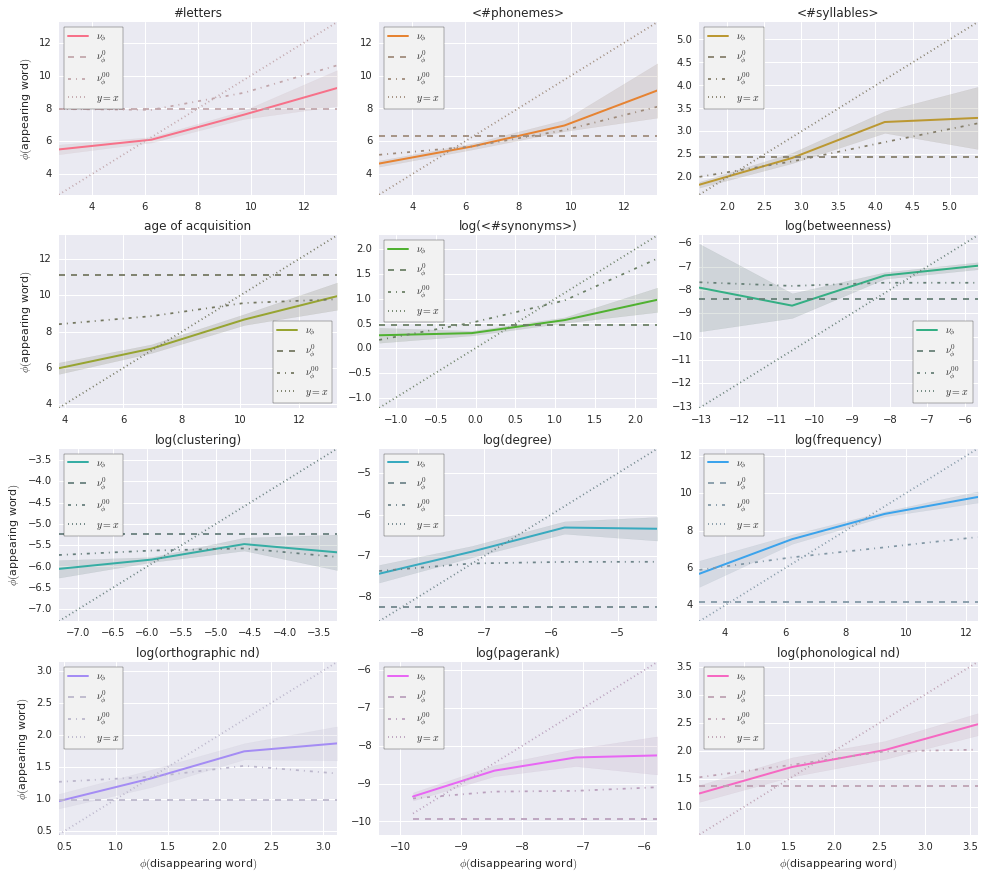

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

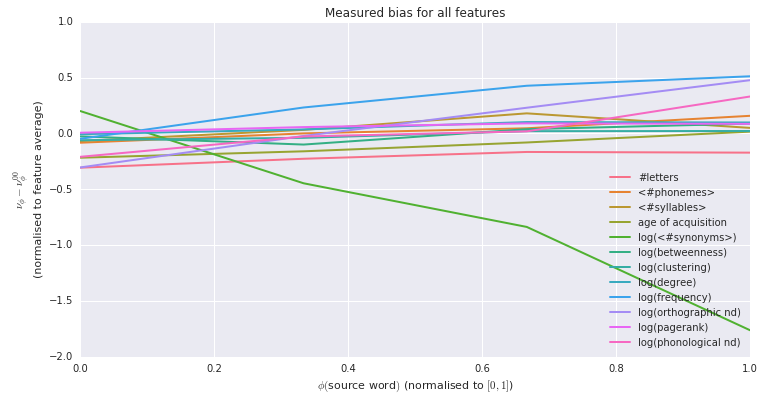

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | **  | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *   |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | *** | *** |


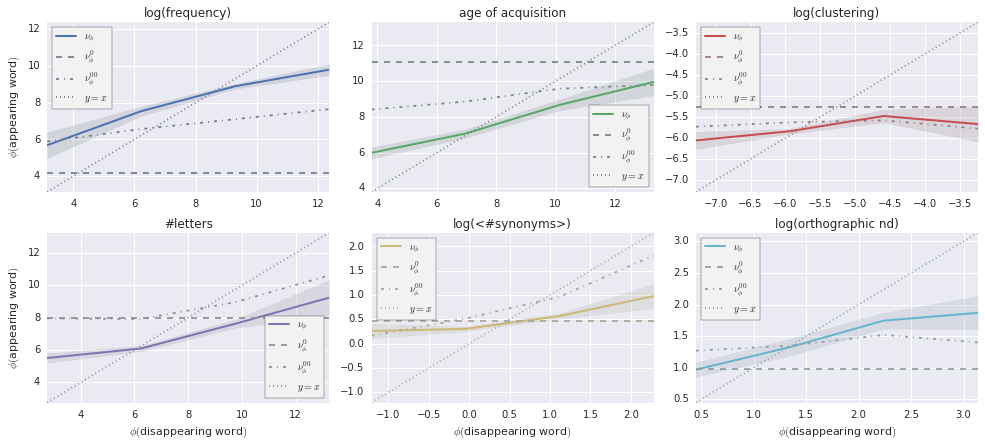

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

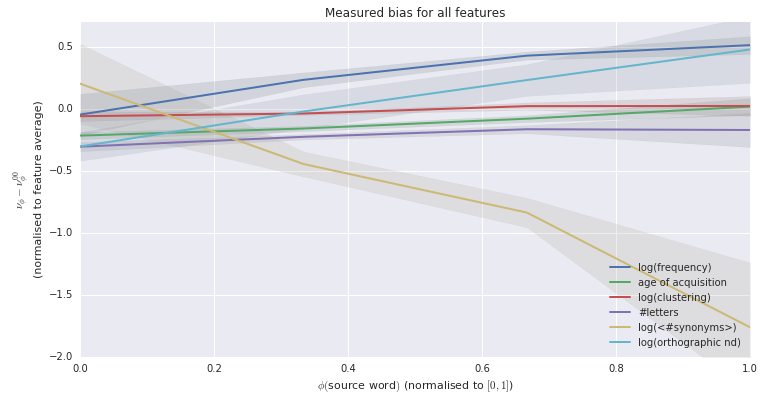

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *** | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | *   | **  |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | *   | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *   | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *** | *   | ns. | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | *** | ns. | ns. | *** |


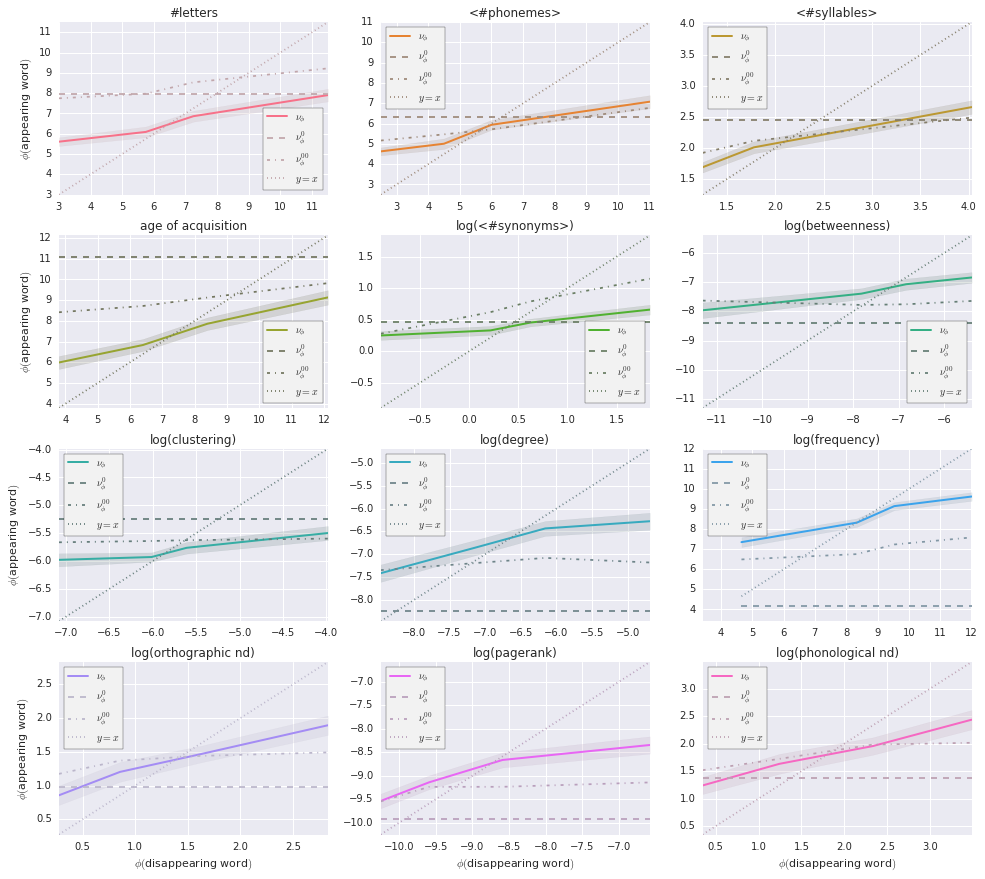

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

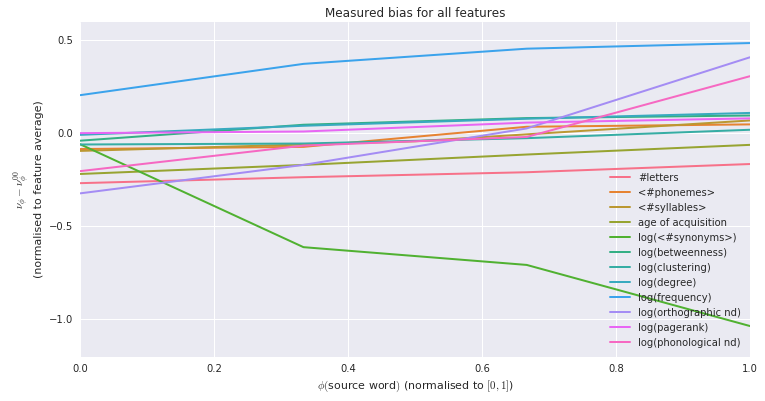

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *** | *   | ns. | *** |


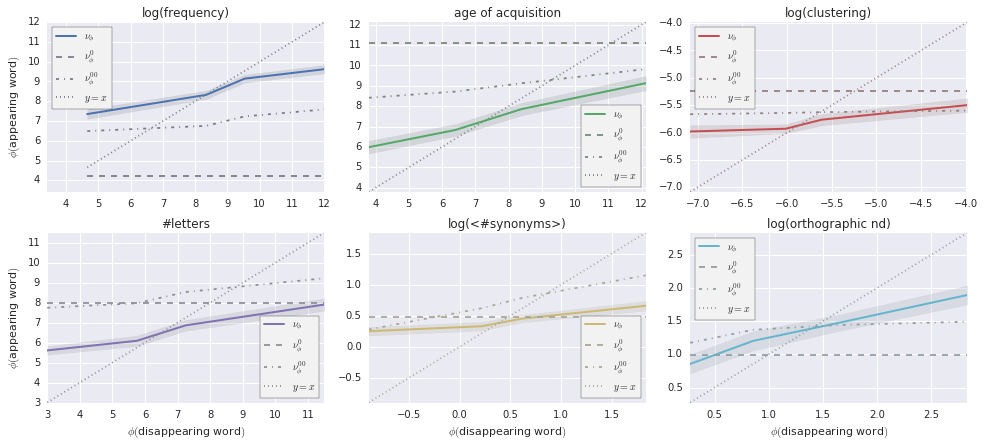

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

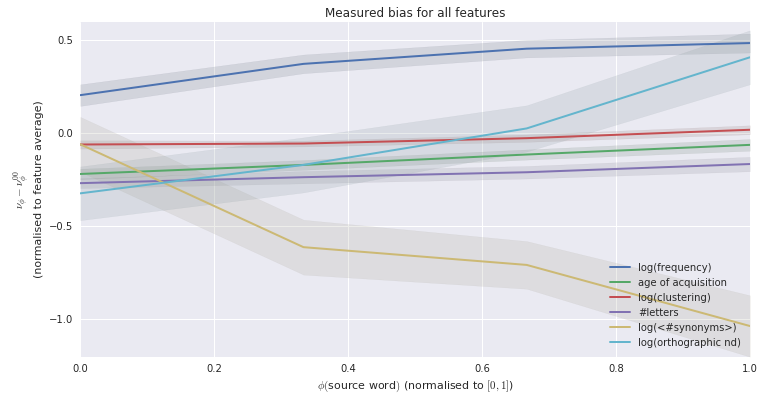

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *   | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | *   |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | *   | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *** | **  | *   | *   |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |


H_00 | **  | ns. | ns. | ns. |


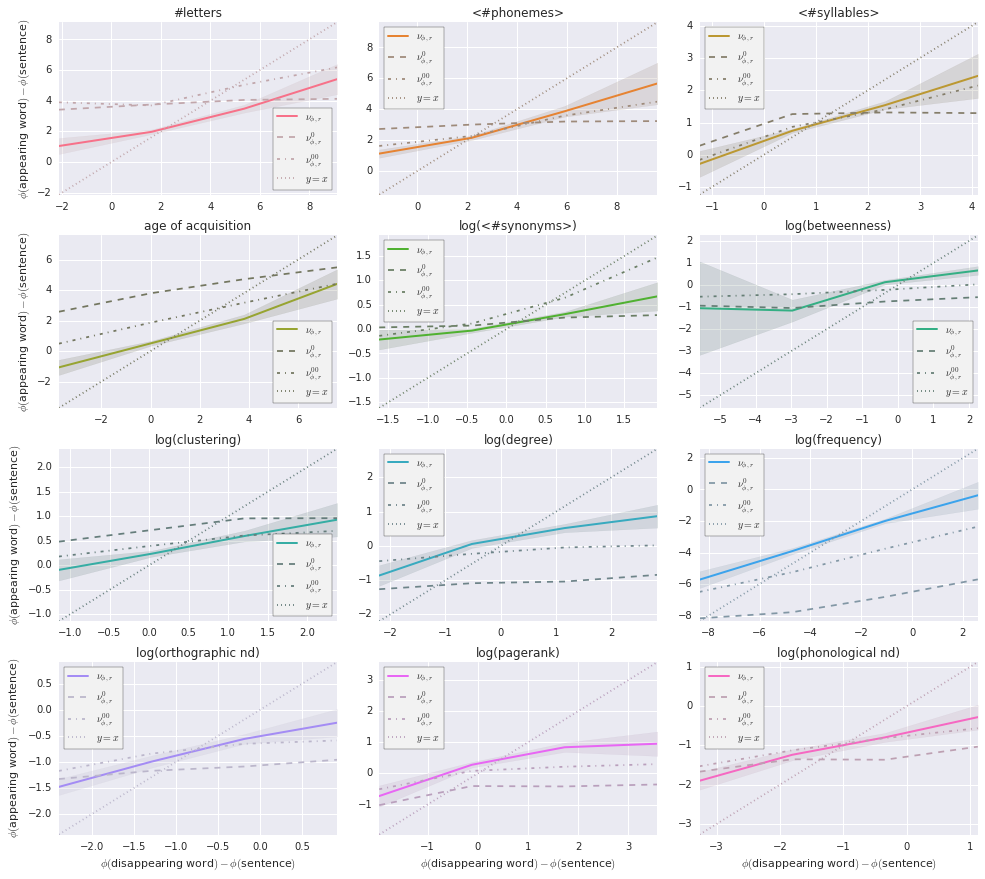

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

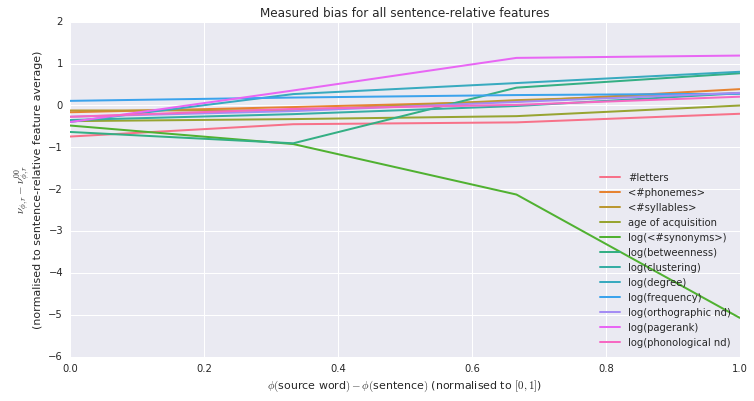

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *   | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | **  | *   |
H_00 | ns. | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *** | **  | *   | *   |


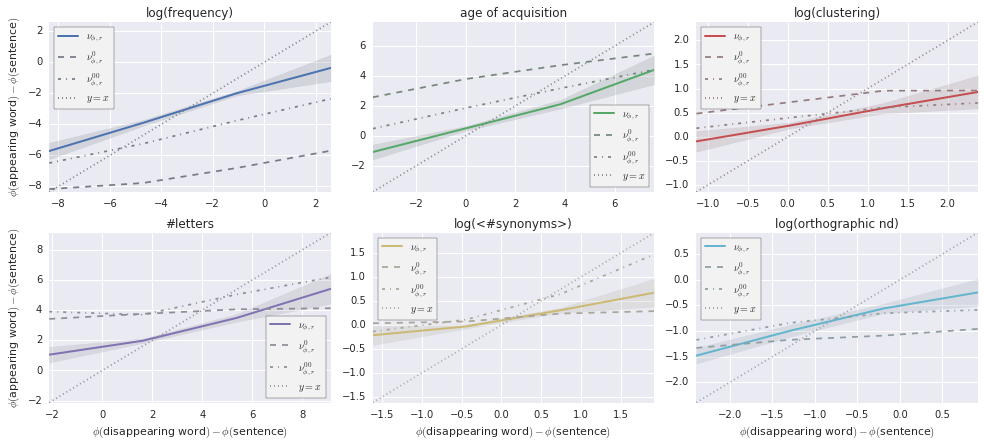

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

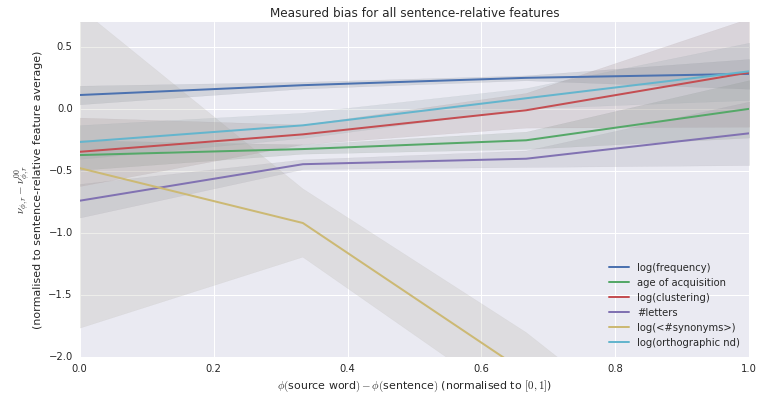

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *   | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | **  | ns. | **  |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | **  | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *** | *   | ns. | *** |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *** | ns. | ns. | ns. |


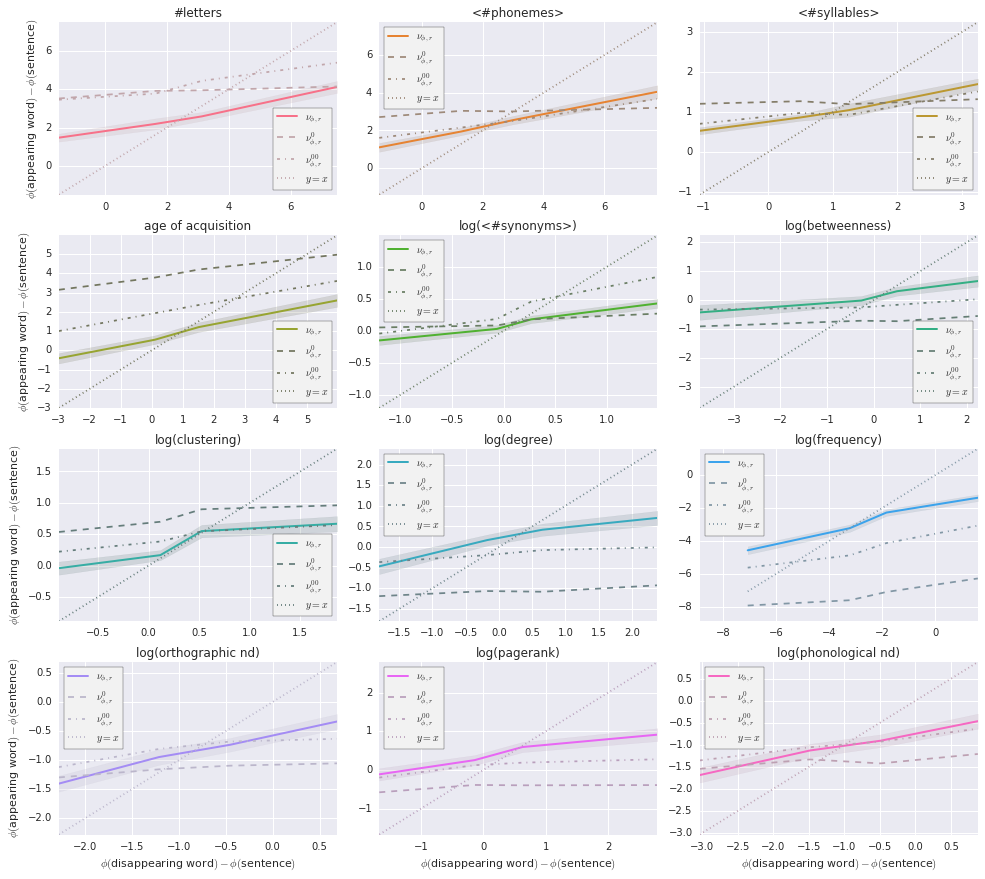

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

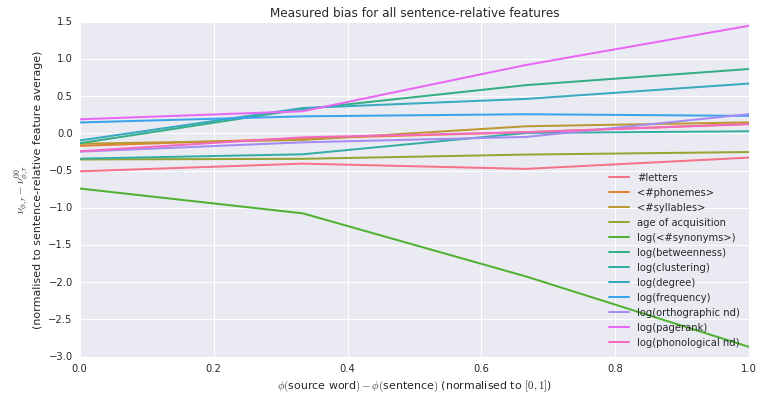

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *** | *   | ns. | *** |


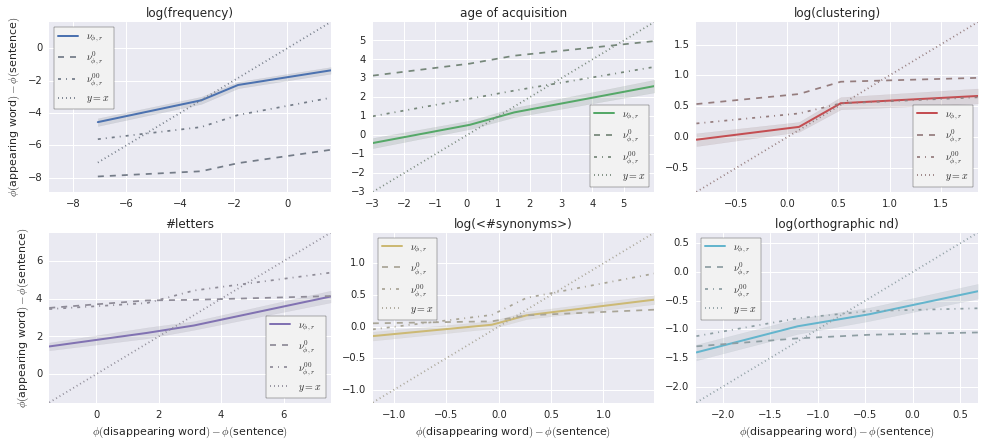

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

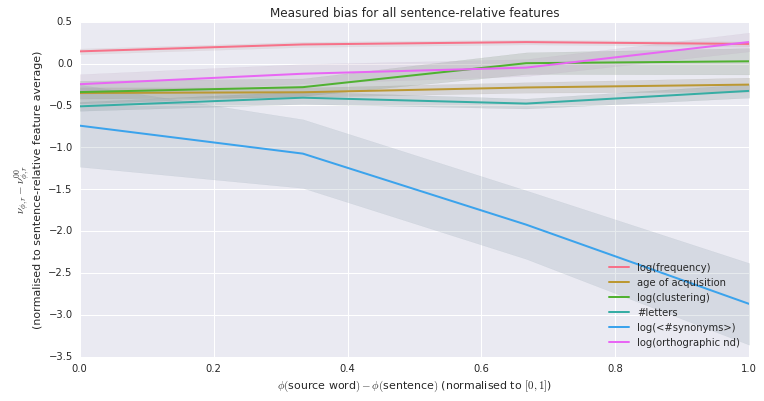

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


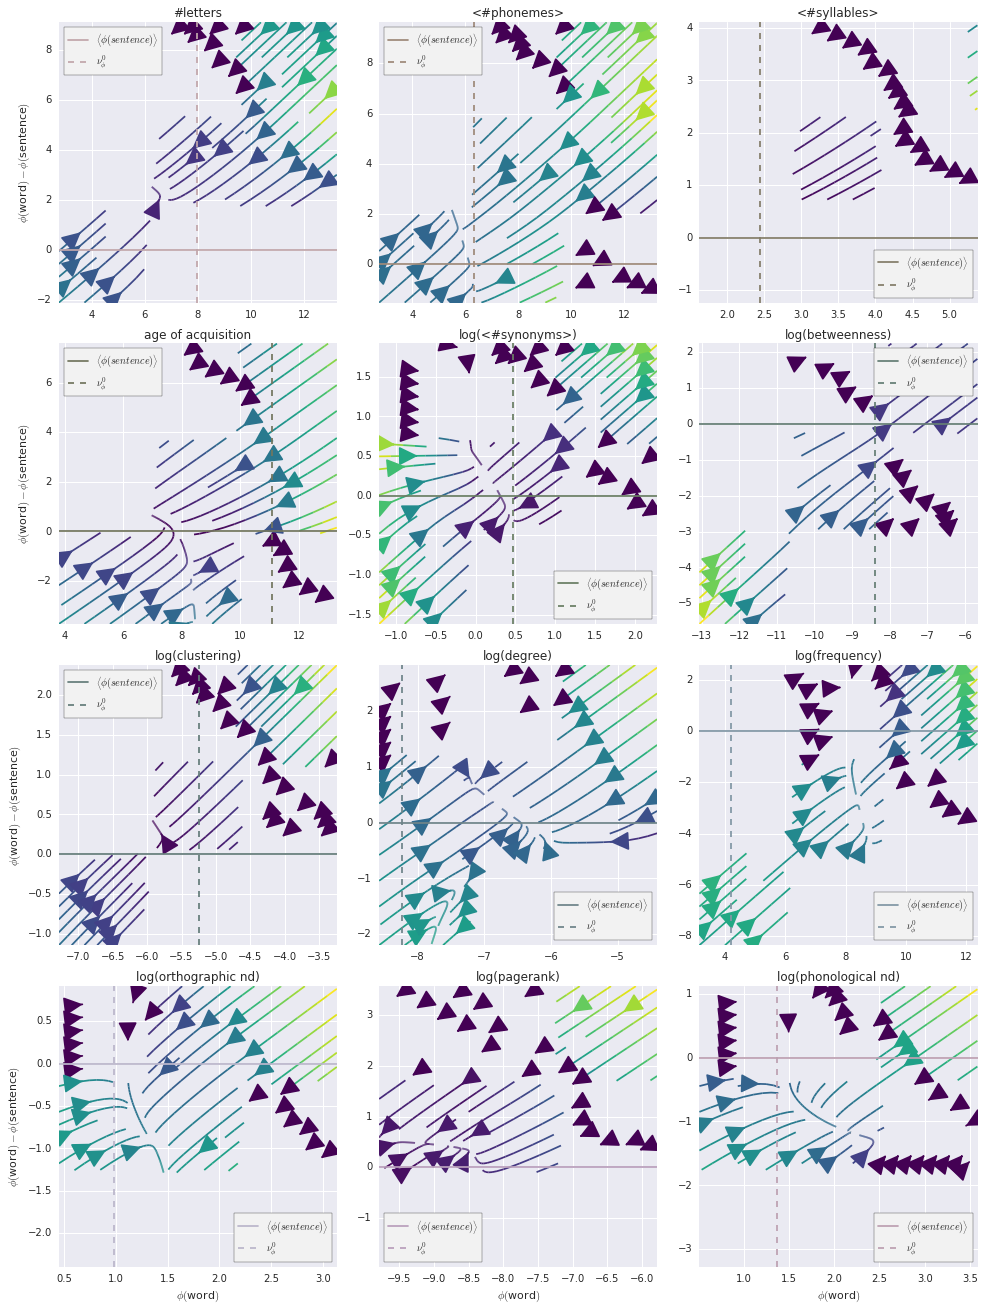

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


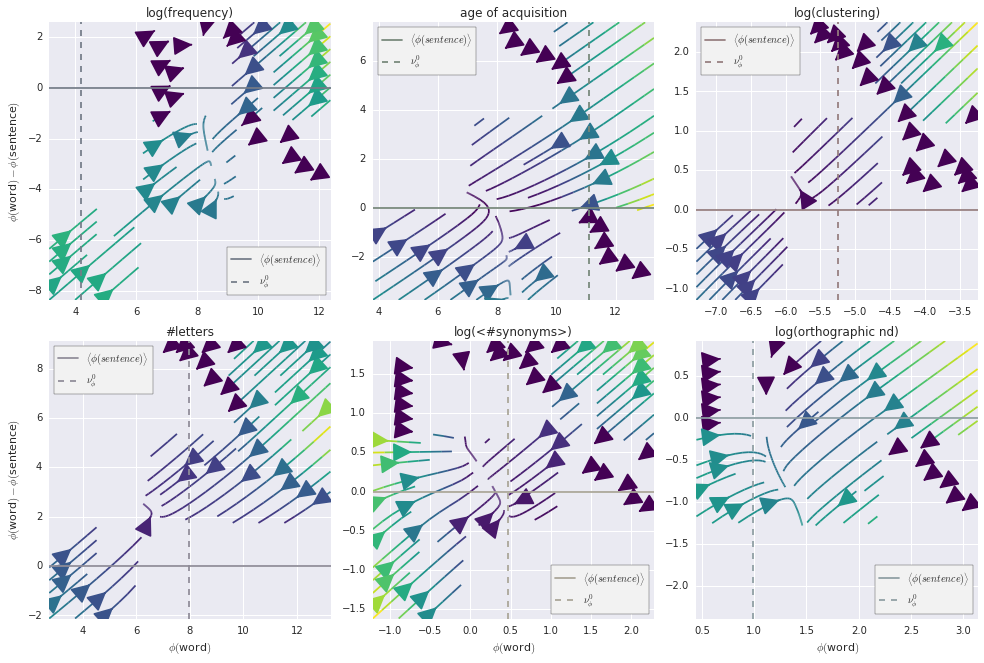

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53887324  0.17885153  0.07678351  0.06656826  0.03555517  0.02773656
  0.02037801  0.01865767  0.01656899  0.00933154]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.483704,0.228647,-0.076458,0.210872,0.216210,-0.454966,0.215477,0.253650,-0.433574,0.288111,-0.166944,0.007933
Component-1,-0.378151,0.387900,-0.164043,0.305139,0.259899,0.408160,-0.141917,0.305147,0.415313,-0.213335,0.144841,-0.011955
Component-2,-0.618874,-0.640249,0.070554,-0.213209,0.276023,0.097740,0.004217,-0.232912,0.067607,-0.084718,0.038280,0.058475


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 3641) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 3641) |                       | Elapsed Time: 0:00:40 ETA: 4:32:51

  0% (  30 of 3641) |                       | Elapsed Time: 0:00:40 ETA: 1:21:49

  1% (  62 of 3641) |                       | Elapsed Time: 0:00:41 ETA: 0:39:27

  2% (  92 of 3641) |                       | Elapsed Time: 0:00:41 ETA: 0:27:05

  3% ( 119 of 3641) |                       | Elapsed Time: 0:00:41 ETA: 0:00:28

  4% ( 152 of 3641) |                       | Elapsed Time: 0:00:41 ETA: 0:00:26

  5% ( 183 of 3641) |#                      | Elapsed Time: 0:00:41 ETA: 0:00:24

  5% ( 207 of 3641) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:26

  6% ( 241 of 3641) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:25

  7% ( 274 of 3641) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:25

  8% ( 303 of 3641) |#                      | Elapsed Time: 0:00:42 ETA: 0:00:25

  9% ( 334 of 3641) |##                     | Elapsed Time: 0:00:43 ETA: 0:00:25

 10% ( 365 of 3641) |##                     | Elapsed Time: 0:00:43 ETA: 0:00:25

 10% ( 394 of 3641) |##                     | Elapsed Time: 0:00:43 ETA: 0:00:24

 11% ( 410 of 3641) |##                     | Elapsed Time: 0:00:43 ETA: 0:00:27

 11% ( 434 of 3641) |##                     | Elapsed Time: 0:00:43 ETA: 0:00:28

 12% ( 469 of 3641) |##                     | Elapsed Time: 0:00:44 ETA: 0:00:27

 13% ( 501 of 3641) |###                    | Elapsed Time: 0:00:44 ETA: 0:00:27

 14% ( 527 of 3641) |###                    | Elapsed Time: 0:00:44 ETA: 0:00:26

 15% ( 560 of 3641) |###                    | Elapsed Time: 0:00:44 ETA: 0:00:24

 16% ( 592 of 3641) |###                    | Elapsed Time: 0:00:45 ETA: 0:00:25

 16% ( 614 of 3641) |###                    | Elapsed Time: 0:00:45 ETA: 0:00:26

 17% ( 638 of 3641) |####                   | Elapsed Time: 0:00:45 ETA: 0:00:26

 18% ( 663 of 3641) |####                   | Elapsed Time: 0:00:45 ETA: 0:00:26

 19% ( 701 of 3641) |####                   | Elapsed Time: 0:00:46 ETA: 0:00:24

 20% ( 729 of 3641) |####                   | Elapsed Time: 0:00:46 ETA: 0:00:22

 20% ( 755 of 3641) |####                   | Elapsed Time: 0:00:46 ETA: 0:00:22

 21% ( 784 of 3641) |####                   | Elapsed Time: 0:00:46 ETA: 0:00:21

 22% ( 803 of 3641) |#####                  | Elapsed Time: 0:00:47 ETA: 0:00:22

 22% ( 834 of 3641) |#####                  | Elapsed Time: 0:00:47 ETA: 0:00:24

 23% ( 865 of 3641) |#####                  | Elapsed Time: 0:00:47 ETA: 0:00:23

 25% ( 911 of 3641) |#####                  | Elapsed Time: 0:00:47 ETA: 0:00:22

 25% ( 934 of 3641) |#####                  | Elapsed Time: 0:00:48 ETA: 0:00:21

 26% ( 956 of 3641) |######                 | Elapsed Time: 0:00:48 ETA: 0:00:21

 26% ( 981 of 3641) |######                 | Elapsed Time: 0:00:48 ETA: 0:00:22

 27% (1016 of 3641) |######                 | Elapsed Time: 0:00:48 ETA: 0:00:21

 28% (1047 of 3641) |######                 | Elapsed Time: 0:00:49 ETA: 0:00:23

 29% (1067 of 3641) |######                 | Elapsed Time: 0:00:49 ETA: 0:00:23

 30% (1093 of 3641) |######                 | Elapsed Time: 0:00:49 ETA: 0:00:23

 30% (1121 of 3641) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:22

 31% (1151 of 3641) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:22

 32% (1184 of 3641) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:19

 33% (1211 of 3641) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:19

 34% (1244 of 3641) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:18

 35% (1275 of 3641) |########               | Elapsed Time: 0:00:50 ETA: 0:00:18

 35% (1303 of 3641) |########               | Elapsed Time: 0:00:51 ETA: 0:00:18

 36% (1334 of 3641) |########               | Elapsed Time: 0:00:51 ETA: 0:00:18

 37% (1366 of 3641) |########               | Elapsed Time: 0:00:51 ETA: 0:00:17

 38% (1391 of 3641) |########               | Elapsed Time: 0:00:51 ETA: 0:00:17

 39% (1421 of 3641) |########               | Elapsed Time: 0:00:52 ETA: 0:00:18

 40% (1457 of 3641) |#########              | Elapsed Time: 0:00:52 ETA: 0:00:18

 40% (1481 of 3641) |#########              | Elapsed Time: 0:00:52 ETA: 0:00:18

 41% (1516 of 3641) |#########              | Elapsed Time: 0:00:52 ETA: 0:00:18

 42% (1548 of 3641) |#########              | Elapsed Time: 0:00:53 ETA: 0:00:18

 43% (1573 of 3641) |#########              | Elapsed Time: 0:00:53 ETA: 0:00:17

 44% (1608 of 3641) |##########             | Elapsed Time: 0:00:53 ETA: 0:00:16

 45% (1639 of 3641) |##########             | Elapsed Time: 0:00:53 ETA: 0:00:16

 45% (1666 of 3641) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:15

 46% (1698 of 3641) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:16

 47% (1730 of 3641) |##########             | Elapsed Time: 0:00:54 ETA: 0:00:15

 48% (1756 of 3641) |###########            | Elapsed Time: 0:00:54 ETA: 0:00:15

 49% (1788 of 3641) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:14

 50% (1821 of 3641) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:14

 50% (1846 of 3641) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:14

 51% (1880 of 3641) |###########            | Elapsed Time: 0:00:55 ETA: 0:00:14

 52% (1912 of 3641) |############           | Elapsed Time: 0:00:56 ETA: 0:00:14

 53% (1938 of 3641) |############           | Elapsed Time: 0:00:56 ETA: 0:00:13

 54% (1969 of 3641) |############           | Elapsed Time: 0:00:56 ETA: 0:00:14

 54% (1993 of 3641) |############           | Elapsed Time: 0:00:56 ETA: 0:00:14

 55% (2015 of 3641) |############           | Elapsed Time: 0:00:57 ETA: 0:00:14

 56% (2039 of 3641) |############           | Elapsed Time: 0:00:57 ETA: 0:00:14

 56% (2063 of 3641) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:14

 57% (2094 of 3641) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:12

 58% (2121 of 3641) |#############          | Elapsed Time: 0:00:57 ETA: 0:00:12

 59% (2155 of 3641) |#############          | Elapsed Time: 0:00:58 ETA: 0:00:11

 60% (2185 of 3641) |#############          | Elapsed Time: 0:00:58 ETA: 0:00:11

 60% (2211 of 3641) |#############          | Elapsed Time: 0:00:58 ETA: 0:00:11

 61% (2245 of 3641) |##############         | Elapsed Time: 0:00:58 ETA: 0:00:11

 62% (2276 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:10

 63% (2302 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:10

 64% (2336 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:09

 65% (2367 of 3641) |##############         | Elapsed Time: 0:00:59 ETA: 0:00:09

 65% (2396 of 3641) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:09

 66% (2428 of 3641) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:09

 67% (2458 of 3641) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:08

 68% (2483 of 3641) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:08

 68% (2512 of 3641) |###############        | Elapsed Time: 0:01:00 ETA: 0:00:08

 70% (2549 of 3641) |################       | Elapsed Time: 0:01:01 ETA: 0:00:08

 70% (2572 of 3641) |################       | Elapsed Time: 0:01:01 ETA: 0:00:09

 71% (2610 of 3641) |################       | Elapsed Time: 0:01:01 ETA: 0:00:08

 72% (2640 of 3641) |################       | Elapsed Time: 0:01:01 ETA: 0:00:08

 73% (2666 of 3641) |################       | Elapsed Time: 0:01:02 ETA: 0:00:07

 74% (2701 of 3641) |#################      | Elapsed Time: 0:01:02 ETA: 0:00:07

 75% (2731 of 3641) |#################      | Elapsed Time: 0:01:02 ETA: 0:00:07

 75% (2756 of 3641) |#################      | Elapsed Time: 0:01:02 ETA: 0:00:06

 76% (2791 of 3641) |#################      | Elapsed Time: 0:01:03 ETA: 0:00:06

 77% (2822 of 3641) |#################      | Elapsed Time: 0:01:03 ETA: 0:00:06

 78% (2852 of 3641) |##################     | Elapsed Time: 0:01:03 ETA: 0:00:05

 79% (2883 of 3641) |##################     | Elapsed Time: 0:01:03 ETA: 0:00:05

 80% (2913 of 3641) |##################     | Elapsed Time: 0:01:04 ETA: 0:00:05

 80% (2942 of 3641) |##################     | Elapsed Time: 0:01:04 ETA: 0:00:05

 81% (2973 of 3641) |##################     | Elapsed Time: 0:01:04 ETA: 0:00:05

 82% (3004 of 3641) |##################     | Elapsed Time: 0:01:04 ETA: 0:00:04

 83% (3034 of 3641) |###################    | Elapsed Time: 0:01:04 ETA: 0:00:04

 84% (3060 of 3641) |###################    | Elapsed Time: 0:01:05 ETA: 0:00:04

 85% (3095 of 3641) |###################    | Elapsed Time: 0:01:05 ETA: 0:00:04

 85% (3121 of 3641) |###################    | Elapsed Time: 0:01:05 ETA: 0:00:04

 86% (3157 of 3641) |###################    | Elapsed Time: 0:01:05 ETA: 0:00:03

 87% (3186 of 3641) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:03

 88% (3214 of 3641) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:03

 89% (3245 of 3641) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:03

 90% (3277 of 3641) |####################   | Elapsed Time: 0:01:06 ETA: 0:00:02

 90% (3302 of 3641) |####################   | Elapsed Time: 0:01:07 ETA: 0:00:02

 91% (3336 of 3641) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:02

 92% (3368 of 3641) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:02

 93% (3394 of 3641) |#####################  | Elapsed Time: 0:01:07 ETA: 0:00:01

 94% (3427 of 3641) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:01

 95% (3459 of 3641) |#####################  | Elapsed Time: 0:01:08 ETA: 0:00:01

 95% (3489 of 3641) |###################### | Elapsed Time: 0:01:08 ETA: 0:00:01

 96% (3520 of 3641) |###################### | Elapsed Time: 0:01:08 ETA: 0:00:00

 97% (3550 of 3641) |###################### | Elapsed Time: 0:01:08 ETA: 0:00:00

 98% (3577 of 3641) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

 99% (3609 of 3641) |###################### | Elapsed Time: 0:01:09 ETA: 0:00:00

100% (3641 of 3641) |######################| Elapsed Time: 0:01:09 Time: 0:01:09


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | **  | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | **  | ns. |


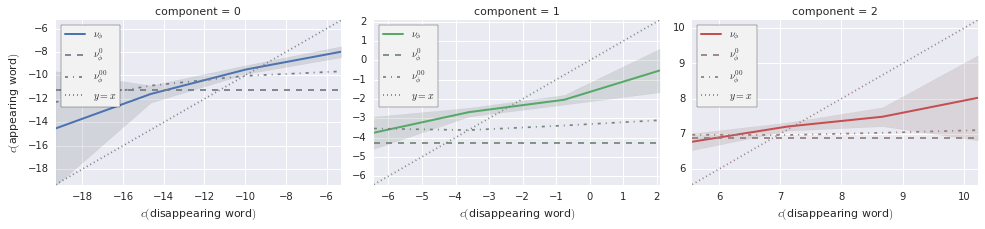

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67738475  0.20303107]



,aoa,frequency,letters_count
Component-0,-0.750396,0.382365,-0.539168
Component-1,0.417695,-0.357882,-0.835136


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 3641) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  16 of 3641) |                       | Elapsed Time: 0:00:02 ETA: 0:10:38

  1% (  66 of 3641) |                       | Elapsed Time: 0:00:03 ETA: 0:02:48

  2% ( 109 of 3641) |                       | Elapsed Time: 0:00:03 ETA: 0:01:49

  4% ( 155 of 3641) |                       | Elapsed Time: 0:00:03 ETA: 0:01:21

  5% ( 199 of 3641) |#                      | Elapsed Time: 0:00:03 ETA: 0:00:20

  6% ( 244 of 3641) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:20

  8% ( 292 of 3641) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:19

  9% ( 337 of 3641) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:19

 10% ( 382 of 3641) |##                     | Elapsed Time: 0:00:04 ETA: 0:00:19

 11% ( 410 of 3641) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:19

 12% ( 456 of 3641) |##                     | Elapsed Time: 0:00:05 ETA: 0:00:19

 13% ( 501 of 3641) |###                    | Elapsed Time: 0:00:05 ETA: 0:00:19

 15% ( 547 of 3641) |###                    | Elapsed Time: 0:00:06 ETA: 0:00:18

 16% ( 592 of 3641) |###                    | Elapsed Time: 0:00:06 ETA: 0:00:18

 17% ( 638 of 3641) |####                   | Elapsed Time: 0:00:06 ETA: 0:00:17

 18% ( 683 of 3641) |####                   | Elapsed Time: 0:00:06 ETA: 0:00:17

 20% ( 729 of 3641) |####                   | Elapsed Time: 0:00:07 ETA: 0:00:17

 21% ( 774 of 3641) |####                   | Elapsed Time: 0:00:07 ETA: 0:00:17

 22% ( 820 of 3641) |#####                  | Elapsed Time: 0:00:07 ETA: 0:00:17

 23% ( 865 of 3641) |#####                  | Elapsed Time: 0:00:07 ETA: 0:00:16

 25% ( 911 of 3641) |#####                  | Elapsed Time: 0:00:08 ETA: 0:00:15

 26% ( 956 of 3641) |######                 | Elapsed Time: 0:00:08 ETA: 0:00:16

 27% (1002 of 3641) |######                 | Elapsed Time: 0:00:08 ETA: 0:00:15

 28% (1047 of 3641) |######                 | Elapsed Time: 0:00:09 ETA: 0:00:15

 29% (1077 of 3641) |######                 | Elapsed Time: 0:00:09 ETA: 0:00:15

 30% (1110 of 3641) |#######                | Elapsed Time: 0:00:09 ETA: 0:00:15

 31% (1156 of 3641) |#######                | Elapsed Time: 0:00:09 ETA: 0:00:15

 32% (1201 of 3641) |#######                | Elapsed Time: 0:00:09 ETA: 0:00:14

 34% (1247 of 3641) |#######                | Elapsed Time: 0:00:10 ETA: 0:00:14

 35% (1294 of 3641) |########               | Elapsed Time: 0:00:10 ETA: 0:00:13

 36% (1338 of 3641) |########               | Elapsed Time: 0:00:10 ETA: 0:00:13

 37% (1383 of 3641) |########               | Elapsed Time: 0:00:10 ETA: 0:00:12

 39% (1428 of 3641) |#########              | Elapsed Time: 0:00:11 ETA: 0:00:12

 40% (1475 of 3641) |#########              | Elapsed Time: 0:00:11 ETA: 0:00:12

 41% (1520 of 3641) |#########              | Elapsed Time: 0:00:11 ETA: 0:00:12

 43% (1566 of 3641) |#########              | Elapsed Time: 0:00:12 ETA: 0:00:12

 44% (1612 of 3641) |##########             | Elapsed Time: 0:00:12 ETA: 0:00:12

 45% (1658 of 3641) |##########             | Elapsed Time: 0:00:12 ETA: 0:00:11

 46% (1703 of 3641) |##########             | Elapsed Time: 0:00:12 ETA: 0:00:11

 48% (1749 of 3641) |###########            | Elapsed Time: 0:00:13 ETA: 0:00:10

 49% (1793 of 3641) |###########            | Elapsed Time: 0:00:13 ETA: 0:00:10

 50% (1840 of 3641) |###########            | Elapsed Time: 0:00:13 ETA: 0:00:10

 51% (1885 of 3641) |###########            | Elapsed Time: 0:00:13 ETA: 0:00:10

 52% (1929 of 3641) |############           | Elapsed Time: 0:00:14 ETA: 0:00:09

 54% (1974 of 3641) |############           | Elapsed Time: 0:00:14 ETA: 0:00:09

 55% (2020 of 3641) |############           | Elapsed Time: 0:00:14 ETA: 0:00:09

 56% (2067 of 3641) |#############          | Elapsed Time: 0:00:15 ETA: 0:00:09

 58% (2112 of 3641) |#############          | Elapsed Time: 0:00:15 ETA: 0:00:09

 59% (2158 of 3641) |#############          | Elapsed Time: 0:00:15 ETA: 0:00:08

 60% (2202 of 3641) |#############          | Elapsed Time: 0:00:15 ETA: 0:00:08

 61% (2249 of 3641) |##############         | Elapsed Time: 0:00:16 ETA: 0:00:08

 63% (2295 of 3641) |##############         | Elapsed Time: 0:00:16 ETA: 0:00:07

 64% (2341 of 3641) |##############         | Elapsed Time: 0:00:16 ETA: 0:00:07

 65% (2386 of 3641) |###############        | Elapsed Time: 0:00:16 ETA: 0:00:07

 66% (2432 of 3641) |###############        | Elapsed Time: 0:00:17 ETA: 0:00:06

 67% (2474 of 3641) |###############        | Elapsed Time: 0:00:17 ETA: 0:00:06

 69% (2519 of 3641) |###############        | Elapsed Time: 0:00:17 ETA: 0:00:06

 70% (2567 of 3641) |################       | Elapsed Time: 0:00:17 ETA: 0:00:06

 71% (2614 of 3641) |################       | Elapsed Time: 0:00:18 ETA: 0:00:05

 73% (2659 of 3641) |################       | Elapsed Time: 0:00:18 ETA: 0:00:05

 74% (2705 of 3641) |#################      | Elapsed Time: 0:00:18 ETA: 0:00:05

 75% (2748 of 3641) |#################      | Elapsed Time: 0:00:18 ETA: 0:00:05

 76% (2795 of 3641) |#################      | Elapsed Time: 0:00:19 ETA: 0:00:04

 78% (2841 of 3641) |#################      | Elapsed Time: 0:00:19 ETA: 0:00:04

 79% (2886 of 3641) |##################     | Elapsed Time: 0:00:19 ETA: 0:00:04

 80% (2930 of 3641) |##################     | Elapsed Time: 0:00:20 ETA: 0:00:04

 81% (2977 of 3641) |##################     | Elapsed Time: 0:00:20 ETA: 0:00:03

 83% (3023 of 3641) |###################    | Elapsed Time: 0:00:20 ETA: 0:00:03

 84% (3066 of 3641) |###################    | Elapsed Time: 0:00:20 ETA: 0:00:03

 85% (3113 of 3641) |###################    | Elapsed Time: 0:00:21 ETA: 0:00:03

 86% (3159 of 3641) |###################    | Elapsed Time: 0:00:21 ETA: 0:00:02

 88% (3205 of 3641) |####################   | Elapsed Time: 0:00:21 ETA: 0:00:02

 89% (3249 of 3641) |####################   | Elapsed Time: 0:00:21 ETA: 0:00:02

 90% (3293 of 3641) |####################   | Elapsed Time: 0:00:22 ETA: 0:00:02

 91% (3340 of 3641) |#####################  | Elapsed Time: 0:00:22 ETA: 0:00:01

 92% (3385 of 3641) |#####################  | Elapsed Time: 0:00:22 ETA: 0:00:01

 94% (3431 of 3641) |#####################  | Elapsed Time: 0:00:22 ETA: 0:00:01

 95% (3478 of 3641) |#####################  | Elapsed Time: 0:00:23 ETA: 0:00:00

 96% (3523 of 3641) |###################### | Elapsed Time: 0:00:23 ETA: 0:00:00

 97% (3568 of 3641) |###################### | Elapsed Time: 0:00:23 ETA: 0:00:00

 99% (3614 of 3641) |###################### | Elapsed Time: 0:00:24 ETA: 0:00:00

100% (3641 of 3641) |######################| Elapsed Time: 0:00:24 Time: 0:00:24


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |


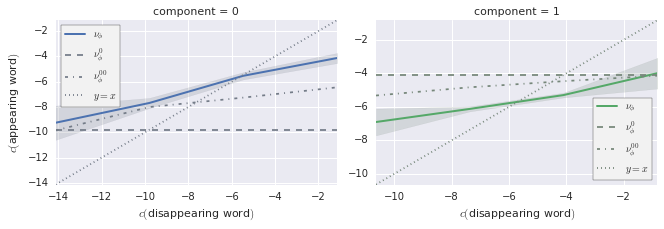

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1305 (cluster-unique) substitutions, but the PCA is in fact computed on 1001 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa


   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


    * global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 771 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.15238203928262029

intercept                      4.278016
global_aoa                     0.074426
global_clustering              0.087522
global_frequency               0.523831
global_letters_count          -0.022200
global_orthographic_density   -0.037976
global_synonyms_count          0.006073
dtype: float64

Regressing global frequency with 771 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.17338539451881185

intercept                                             -4.730022
global_aoa                                             0.600903
global_clustering                                     -0.270165
global_frequency                                       1.561821
global_letters_count                                   0.056856
global_orthographic_density                            1.664570
global_syno

Regressing rel frequency with 771 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.28369272547783253

intercept                  -1.226112
rel_aoa                     0.071225
rel_clustering              0.125077
rel_frequency               0.655343
rel_letters_count          -0.065769
rel_orthographic_density   -0.214411
rel_synonyms_count          0.017318
dtype: float64

Regressing rel frequency with 771 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.307721220513119

intercept                                       -1.420023
rel_aoa                                          0.121700
rel_clustering                                   0.142557
rel_frequency                                    0.616754
rel_letters_count                                0.026229
rel_orthographic_density                        -0.495440
rel_synonyms_count                               0.022233
rel_aoa * rel_clustering                        -0.014863
rel_aoa * rel_frequency              

Regressing global aoa with 698 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.21164869067933667

intercept                                             -2.551977
global_aoa                                             0.826382
global_clustering                                     -1.247082
global_frequency                                       0.219421
global_letters_count                                   0.693668
global_orthographic_density                           -1.422048
global_synonyms_count                                 -2.289843
global_aoa * global_clustering                         0.082760
global_aoa * global_frequency                         -0.004568
global_aoa * global_letters_count                      0.011074
global_aoa * global_orthographic_density              -0.012927
global_aoa * global_synonyms_count                     0.132351
global_clustering * global_frequency                   0.030741
global_clustering * global_letters_count               0.073

Regressing global aoa with 698 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.2299215386078043

intercept                      0.851695
global_aoa                     0.543517
global_clustering             -0.732883
global_frequency              -0.255258
global_letters_count           0.201000
global_orthographic_density   -0.070983
global_synonyms_count          0.320383
rel_aoa                       -0.229022
rel_clustering                 0.644668
rel_frequency                  0.126313
rel_letters_count             -0.149247
rel_orthographic_density       0.080680
rel_synonyms_count            -0.369757
dtype: float64

Regressing global aoa with 698 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.3275522185346883

intercept                                                 30.391233
global_aoa                                                 0.781518
global_clustering                                          5.110880
global_frequency                                

Regressing rel clustering with 634 measures, no interactions
           ^^^^^^^^^^^^^^
R^2 = 0.06501173510619607

intercept                      2.304740
global_aoa                    -0.019038
global_clustering              0.218825
global_frequency              -0.041913
global_letters_count          -0.015018
global_orthographic_density   -0.057715
global_synonyms_count         -0.021955
dtype: float64

Regressing rel clustering with 634 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.10552788078628306

intercept                                              5.447327
global_aoa                                             0.255271
global_clustering                                      0.435515
global_frequency                                      -0.561568
global_letters_count                                  -0.279654
global_orthographic_density                           -0.508555
global_synonyms_count                                 -0.586167
global_aoa * global_cluste

Regressing global clustering with 634 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2582679109621435

intercept                                                 11.999013
global_aoa                                                 0.337024
global_clustering                                          2.234348
global_frequency                                          -1.436005
global_letters_count                                      -0.428575
global_orthographic_density                               -2.137132
global_synonyms_count                                     -0.844683
rel_aoa                                                   -0.960745
rel_clustering                                            -2.477160
rel_frequency                                              0.196833
rel_letters_count                                          0.148343
rel_orthographic_density                                   1.032530
rel_synonyms_count                                        -2.21

Regressing global letters_count with 771 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.11559722648906667

intercept                   5.394513
rel_aoa                    -0.150419
rel_clustering              0.184276
rel_frequency               0.044852
rel_letters_count           0.315865
rel_orthographic_density   -0.278232
rel_synonyms_count         -0.273982
dtype: float64

Regressing global letters_count with 771 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.13149006911378902

intercept                                        5.359096
rel_aoa                                         -0.286758
rel_clustering                                   0.188947
rel_frequency                                    0.082255
rel_letters_count                                0.448497
rel_orthographic_density                        -0.205383
rel_synonyms_count                              -0.296831
rel_aoa * rel_clustering                         0.066509
rel_aoa

Regressing rel letters_count with 771 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2947149423857002

intercept                                                 13.285382
global_aoa                                                -0.691248
global_clustering                                          0.315999
global_frequency                                           0.708147
global_letters_count                                      -3.405989
global_orthographic_density                               -7.769035
global_synonyms_count                                      8.755045
rel_aoa                                                   -2.974644
rel_clustering                                            -1.941032
rel_frequency                                              0.993148
rel_letters_count                                          4.056629
rel_orthographic_density                                   1.082669
rel_synonyms_count                                        -7.42

Regressing rel synonyms_count with 752 measures, no interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.13275095707629714

intercept                   0.073491
rel_aoa                     0.000636
rel_clustering             -0.011444
rel_frequency              -0.022061
rel_letters_count          -0.036195
rel_orthographic_density   -0.029017
rel_synonyms_count          0.348122
dtype: float64

Regressing rel synonyms_count with 752 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.16210136694761043

intercept                                        0.177848
rel_aoa                                          0.013342
rel_clustering                                  -0.127215
rel_frequency                                    0.014247
rel_letters_count                               -0.079769
rel_orthographic_density                         0.017303
rel_synonyms_count                               0.370360
rel_aoa * rel_clustering                        -0.001927
rel_aoa * rel_f

Regressing global orthographic_density with 653 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.18143793314190848

intercept                                             -0.605878
global_aoa                                             0.033848
global_clustering                                      0.180025
global_frequency                                       0.379396
global_letters_count                                   0.060560
global_orthographic_density                            0.584955
global_synonyms_count                                 -0.377798
global_aoa * global_clustering                        -0.051028
global_aoa * global_frequency                         -0.035429
global_aoa * global_letters_count                     -0.012015
global_aoa * global_orthographic_density               0.036013
global_aoa * global_synonyms_count                    -0.012706
global_clustering * global_frequency                   0.022297
global_clustering * global

Regressing global orthographic_density with 653 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.17030118618339052

intercept                      3.290688
global_aoa                    -0.057714
global_clustering              0.267333
global_frequency               0.006301
global_letters_count          -0.071613
global_orthographic_density    0.309871
global_synonyms_count         -0.209041
rel_aoa                        0.058190
rel_clustering                -0.272144
rel_frequency                  0.029626
rel_letters_count              0.069643
rel_orthographic_density       0.021428
rel_synonyms_count             0.280614
dtype: float64

Regressing global orthographic_density with 653 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.24957591497232998

intercept                                                 4.710798
global_aoa                                               -0.062297
global_clustering                               